


# House keeping

Installs the reuqired libraries for creating the images and excel file

In [1]:
!pip install rdkit
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 6.3 MB/s eta 0:00:00


In [2]:
#imports various libraries useful for cheminformatics
from google.colab import drive
drive.mount('/content/drive')
import os
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import cv2
import xlsxwriter
import torch
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw

import seaborn as sns
import gdown
from pathlib import Path
import pandas as pd
import numpy as np

import torch
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

import json
from google.colab import files
import openpyxl



Mounted at /content/drive


In [3]:
#Creates an authenticated connection with google drive allowing the code to do various commands
#Utilized to upload files to the drive after thier creation
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive_auth = GoogleDrive(gauth)

MessageError: Error: credential propagation was unsuccessful

#Initial Variables Creation (PNG Paths and SMILES)

In [ ]:
#Creates a list of all file names of the structures images and a list of thier paths
folder_path = '/content/drive/MyDrive/Polymer_Scattering _ML/Structures image'
all_files = os.listdir(folder_path)
png_files = [f for f in all_files if f.endswith('.png') or f.endswith('.PNG')]
png_paths = [os.path.join(folder_path, f) for f in png_files]
print(len(png_paths))

First time approach, runs both models (molscribe & Decimer) to create two lists of SMILES

In [ ]:
# # Installs MolScribe
#!pip install molscribe

In [ ]:
# # Imports the MolScribe library and creates the model

# from molscribe import MolScribe
# from huggingface_hub import hf_hub_download

# ckpt_path = hf_hub_download('yujieq/MolScribe', 'swin_base_char_aux_1m.pth')
# model = MolScribe(ckpt_path, device=torch.device('cpu'))


In [ ]:
# #Please go the the first step in File preparation to define png_paths
# # Creates the list of SMILES using MolScribe

# molscribe_smiles:list = []

# for path in png_paths:
#     output = model.predict_image_file(path, return_atoms_bonds=True, return_confidence=True)
#     molscribe_smiles.append(output['smiles'])

In [ ]:
# #Creates and uploads a json file of the MolScribe smiles

# print(len(molscribe_smiles))
# json.dump(molscribe_smiles, open('SMILES_Molscribe.json', 'w'))
# json_file = drive.CreateFile(metadata={'parents': [{"id": "1pCFVDDqFGCHApqvX-uAnF39aUZexbBSw"}],'title': "SMILES_Molscribe.json",'mimeType': 'application/json'})
# json_file.SetContentFile("SMILES_Molscribe.json")
# json_file.Upload()

In [ ]:
# # Installs Decimer
# !pip install decimer
# !pip install git+https://github.com/Kohulan/DECIMER-Image_Transformer.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


  Cloning https://github.com/Kohulan/DECIMER-Image_Transformer.git to /tmp/pip-req-build-mc0t_861
  Running command git clone --filter=blob:none --quiet https://github.com/Kohulan/DECIMER-Image_Transformer.git /tmp/pip-req-build-mc0t_861
  Resolved https://github.com/Kohulan/DECIMER-Image_Transformer.git to commit b09ac80cb173362b5a74ea255c76cd86894bb6ab
  Preparing metadata (setup.py) ... done


In [ ]:
# # Imports the Decimer library and creates the model
# # Avoid using this code when possbile it can take up to 3 minutes per 10 structures (roughly an hour for this dataset)

# from DECIMER import predict_SMILES
# decimer_smiles : list[str] = pd.Series(png_paths).apply(lambda x: predict_SMILES(x)).tolist()

In [ ]:
# #Creates and uploads a json file of the Decimer smiles

# print(len(decimer_smiles))
# json.dump(decimer_smiles, open('SMILES_Decimer.json', 'w'))
# json_file = drive.CreateFile(metadata={'parents': [{"id": "1pCFVDDqFGCHApqvX-uAnF39aUZexbBSw"}],'title': "SMILES_Decimer.json",'mimeType': 'application/json'})
# json_file.SetContentFile("SMILES_Decimer.json")
# json_file.Upload()

Alternative approach, loading the SMILES from json files


In [ ]:
#Load Smiles from json file for Molscribe
smile_json = open("/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/SMILES_Molscribe.json")
molscribe_smiles = json.load(smile_json)
print(type(molscribe_smiles),len(molscribe_smiles))

<class 'list'> 131


In [ ]:
#Load Smiles from json file for Decimer
smile_json = open("/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/SMILES_Decimer.json")
decimer_smiles = json.load(smile_json)
print(type(decimer_smiles),len(decimer_smiles))

<class 'list'> 131


# File preparation

In [ ]:
# Creates a list of Polymer names based on the images names

def process_filename(png_files_name):
    # Split by period
    name_list :list = []
    for filename in png_files_name:
        parts = filename.rsplit('.', 1)

        if len(parts) == 2:
            first_part, _ = parts
            # Split the first part by underscore
            first_part_split = first_part.split('_')

            if len(first_part_split) > 1:
                # If the first part can be split by underscore, return the split parts
                name_list.append(first_part_split[-1])
            else:
                # If the first part cannot be split by underscore, return the first part itself
                name_list.append(first_part)
        else:
            # If the filename does not contain a period, handle as needed (could return an error or a default value)
            return "Invalid filename format"
    return name_list


In [ ]:
#Generates images from smiles and a list of broken smiles
#Uploads generated images to the shared drive

def createing_images_from_smiles(image_names:list,smiles:list,drive_id:str):
  """
  Any unconvertible SMILES will create a replacement of a N2 molecule.
  A list of all the unconvertible smiles will be return as a list
  Unless you're sure all the SMILES are valid, define a variable to equal the function to recieve the returend list
  """
  unconvertible: list = []
  for x, name in enumerate(polymer_names):
    try:
      mol = Chem.MolFromSmiles(smiles[x])
      drawing = Draw.MolToImage(mol)
    except ValueError:
      broken.append(polymer_names[x])
      drawing = Draw.MolToImage(Chem.MolFromSmiles("N#N"))
    drawing.save(f"{name}.png")
    generated_image = drive_auth.CreateFile(metadata={'parents': [{"id": drive_id}],'title': f'{name}','mimeType': 'image/png'})
    generated_image.SetContentFile(f"{name}.png")
    generated_image.Upload()
    break
  print(f"There are {len(unconvertible)} unconvertible smiles")
  return(unconvertible)





NameError: name 'molscribe_smiles' is not defined

In [ ]:
#Creates a list of polymer_names names based on the Orginal Images
polymer_names: list[str] = process_filename(png_files)

#Uploads computer-generated images based on the MolScribe and Decimer SMILES to the drive
#Also returns a list of invalid SMILES
invalid_molscribe: list[str] = createing_images_from_smiles(polymer_names,molscribe_smiles,"1Ygba9W1b2gqvBdkGyMxvTlOvn5EiXn2I")
invalid_decimer: list[str] = createing_images_from_smiles(polymer_names,clean_SMILES,"1VyI362LuEOgXkfe4yoXe72j-mePaCAov")

In [ ]:
#Creates a list of all paths of the MolScribe generated images
folder_path = '/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/Generated Images'
all_files = os.listdir(folder_path)
Molscribe_paths = [os.path.join(folder_path, f) for f in png_files]
print(len(Molscribe_paths))

#Creates a list of all paths of the generated Decimer images
folder_path = '/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/Decimer Images'
all_files = os.listdir(folder_path)
Decimer_paths = [os.path.join(folder_path, f) for f in polymer_names]
print(len(Decimer_paths))

131


In [ ]:
#Should this be automaticlly applied to the decimer_smiles when creating them? -Mohannad A
clean_SMILES = []
for smile in decimer_smiles:
  clean_SMILES.append(smile.split(".")[0])

In [ ]:
# I need to find an optimal way to create excel files using a function (It might be easier to not make it a function but that doesn't feel like proper practice)

# def creating_excel_file(filename:str,columns:dict,,drive_id:str)
#   #Create the excel file and uploads it to drive
#   exportfile = xlsxwriter.Workbook(filename)
#   worksheet = exportfile.add_worksheet()

#   #Formating
#   cell_format = exportfile.add_format()
#   cell_format.set_text_wrap()
#   cell_format.set_align("vcenter")
#   cell_format.set_align("center")
#   worksheet.set_column(first_col=0, last_col=0, width=40)
#   worksheet.set_column(0, len(columns)-1, width=30)
#   worksheet.set_default_row(90)
#   worksheet.set_row(0, 21, cell_format)

#   for col_name, col_num in columns.items():
#       worksheet.write(0, col_num, col_name)


#   for row in range(len(png_paths)):
#       worksheet.embed_image(row + 1, columns['Original image'], png_paths[row])
#       worksheet.embed_image(row + 1, columns['Molscribe image'], Molscribe_paths[row])
#       worksheet.embed_image(row + 1, columns['Decimer image'], Decimer_paths[row])


#   worksheet.write_column(1,0,polymer_names, cell_format)
#   worksheet.write_column(1,3,molscribe_smiles)
#   worksheet.write_column(1,5,clean_SMILES)


#   exportfile.close()
#   sheets_file = drive.CreateFile(metadata={'parents': [{"id": drive_id}],'title': filename,'mimeType': 'application/msexcel'})
#   sheets_file.SetContentFile(filename)
#   sheets_file.Upload()

# columns = {
#           'Name': 0,
#           'Original image': 1,
#           'Molscribe image': 2,
#           'Molscribe SMILES': 3,
#           'Decimer image': 4,
#           'Decimer SMILES': 5,
#           'Correct SMILES': 6,
#       }

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Reading The Results

In [ ]:
#dataframe = pd.read_excel('/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/Mohannad_Results.xlsx')
polymer_structures_df: pd.DataFrame = pd.read_excel('/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/Latest_Results.xlsx')
polymer_structures_df = polymer_structures_df.dropna(how='all')
print(polymer_structures_df)

NameError: name 'pd' is not defined

In [ ]:
#Creates a list of all paths of the generated images
folder_path = '/content/drive/Shareddrives/Data-Driven Organic Materials Lab/Projects/Sina_DT/Polymer_Scattering_Dataset/Testing folder'
all_files = os.listdir(folder_path)
Correct_paths = [os.path.join(folder_path, f) for f in polymer_names]
print(len(Correct_paths))

114


In [ ]:
x = 0
for s in polymer_structures_df['Correct SMILES']:
  x += 1
  if type(s) == type(folder_path):
    continue
  else:
    print(polymer_structures_df.iloc[x-1])

In [ ]:
    row = polymer_structures_df.iloc[17]
    print(row["Validation (TRUE/FALSE/TBD/D(Delete))"] == "D" or row["Validation (TRUE/FALSE/TBD/D(Delete))"] == "d")

True


In [ ]:
#Credit to Martin, this code was copied from https://github.com/aspuru-guzik-group/Beyond-Molecular-Structure-ML-for-OPV-Materials-Devices/blob/main/code_/cleaning/cleaning_utils.py

# compare all pairs of unique SMILES
def cleaning_smiles(smiles: pd.Series, polymer: pd.Series, mode: str = "read"):
  """
  Mode ("read" or "edit") determines whether SMILES and/or polymer names should be edited.
  """
  mode = mode.lower()
  duplicates: list[int] = []
  clashes: int = 0
  shared_names: int = 0

  canonicalized_smiles: list[str] = smiles.apply(lambda x: Chem.CanonSmiles(x))
  fps: list = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(mol), 6, nBits=4096) for mol in canonicalized_smiles]

  for x in polymer_structures_df.index:
    row = polymer_structures_df.iloc[x]
    if row["Validation (TRUE/FALSE/TBD/D(Delete))"] == "D":
        duplicates.append(x)
  print(len(duplicates))

  for i, mol1 in enumerate(canonicalized_smiles):
      if i in duplicates:
              continue
      for j, mol2 in enumerate(canonicalized_smiles):
          if j > i:
            if j in duplicates:
              continue

            similarity: float = DataStructs.TanimotoSimilarity(fps[i], fps[j])
            if similarity == 1:
                clashes += 1
                if polymer[j] == polymer[i]:
                  duplicates.append(j)
                  #Should rows with the same structures and name automatically be deleted?  Yes
                else:
                  print(f"Molecules {polymer[i]} and {polymer[j]} clashes at rows:{i+2,j+2}")
                  if mode == "edit":
                    detele_row: int = int(input("Version to be deleted (Enter row number)"))
                    duplicates.append(detele_row-2)
                    continue

            elif polymer[j] == polymer[i]:
              shared_names += 1
              print(f"The diffrent structures at rows:{i+2,j+2} are called {polymer[i]}")
              if mode == "edit":
                action: str = input("Delete or Rename? (Click Enter to pass)").lower()
                if action == "rename":
                  rename_row: int = int(input("Version to be renamed (Enter row number)"))
                  polymer[rename_row-2] = input("New name:")
                elif action == "delete":
                    delete_row: int = int(input("Version to be deleted (Enter row number)"))
                    duplicates.append(delete_row-2)
                    continue



  print("\tmolecule clashes:", clashes, "\n\tshared names:", shared_names)
  print(len(duplicates))

cleaning_smiles(polymer_structures_df['Correct SMILES'],polymer_structures_df['Name'])

22
Molecules PBTTT-C14 and C14 clashes at rows:(4, 16)
Molecules PBTTT-C14 and PBTTT-C16 clashes at rows:(4, 60)
Molecules C14 and PBTTT-C16 clashes at rows:(16, 60)
Molecules DPPDTT(1) and DPPDTT clashes at rows:(35, 61)
Molecules PNDI-C0 and P(NDI2OD-T2) clashes at rows:(43, 64)
Molecules PNDI-C0 and NDI-2T-2OD clashes at rows:(43, 71)
Molecules PNDI-C0 and NDI-C0 clashes at rows:(43, 80)
Molecules PNDI-C0 and P(NDI2OD-T2) clashes at rows:(43, 102)
Molecules PTh-g-PAU17 and PTh-g-PAU48 clashes at rows:(48, 49)
The diffrent structures at rows:(53, 131) are called P3DDT
The diffrent structures at rows:(62, 132) are called P3EHT
Molecules P(NDI2OD-T2) and NDI-2T-2OD clashes at rows:(64, 71)
Molecules P(NDI2OD-T2) and NDI-C0 clashes at rows:(64, 80)
Molecules PCDTPT-ODD and PCPDTPT-ene-ODD clashes at rows:(67, 111)
Molecules NDI-2T-2OD and NDI-C0 clashes at rows:(71, 80)
The diffrent structures at rows:(85, 129) are called P3OT
	molecule clashes: 17 
	shared names: 3
26


In [ ]:
rename_rows = {43:["PNDI-C0","P(NDI2OD-T2)","NDI-C0","NDI-2T-2OD"],67:["PCDTPT-ODD","PCPDTPT-ene-ODD"]}
for r in rename_rows:
    polymer_structures_df["Comments"].iloc[r] = rename_rows[r]
    print(polymer_structures_df["Comments"].iloc[r])

['PNDI-C0', 'P(NDI2OD-T2)', 'NDI-C0', 'NDI-2T-2OD']
['PCDTPT-ODD', 'PCPDTPT-ene-ODD']


<ipython-input-63-7ee4b2fee93c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polymer_structures_df["Comments"].iloc[r] = rename_rows[r]
<ipython-input-63-7ee4b2fee93c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polymer_structures_df["Comments"].iloc[r] = rename_rows[r]


In [ ]:
broken = []
x = 0

for name in polymer_names:
  try:
    mol = Chem.MolFromSmiles(Correct_SMILES[x])
    drawing = Draw.MolToImage(mol)
  except ValueError:
    broken.append(polymer_names[x])
    drawing = Draw.MolToImage(Chem.MolFromSmiles("N#N"))
  drawing.save(f"{name}.png")
  generated_image = drive.CreateFile(metadata={'parents': [{"id": "1EnskAVvoe-BnSC9Ho7MF-K349P7Vr7oy"}],'title': f'{name}','mimeType': 'image/png'})
  generated_image.SetContentFile(f"{name}.png")
  generated_image.Upload()
  x += 1

print(len(broken))

In [ ]:
# broken = []
# x = 0
# Correct_SMILES = updated_structures['Correct SMILES'].tolist()
# polymer_names = updated_structures['Name'].tolist()
# for name in polymer_names:
#   try:
#     mol = Chem.MolFromSmiles(Correct_SMILES[x])
#     drawing = Draw.MolToImage(mol)
#   except ValueError:
#     broken.append(polymer_names[x])
#     drawing = Draw.MolToImage(Chem.MolFromSmiles("N#N"))
#   drawing.save(f"{name}.png")
#   generated_image = drive.CreateFile(metadata={'parents': [{"id": "1_b2QsHPUZL3bl-dYGbSWZWCSLwyO67i4"}],'title': f'{name}','mimeType': 'image/png'})
#   generated_image.SetContentFile(f"{name}.png")
#   generated_image.Upload()
#   x += 1
# print(len(broken))

# Replaced with a function
createing_images_from_smiles(updated_structures['Name'].tolist(),updated_structures['Correct SMILES'].tolist(),"1_b2QsHPUZL3bl-dYGbSWZWCSLwyO67i4")

0


In [ ]:
#Create the excel file and uploads it to drive
filename = "Testing_Results.xlsx"
exportfile = xlsxwriter.Workbook(filename)
worksheet_1 = exportfile.add_worksheet()
worksheet_2 = exportfile.add_worksheet()



#Formating
cell_format = exportfile.add_format()
cell_format.set_text_wrap()
cell_format.set_align("vcenter")
cell_format.set_align("center")
worksheet_1.set_column(first_col=0, last_col=0, width=40)
worksheet_1.set_column(0, 5, width=30)
worksheet_1.set_column(2, 2, width=17)
worksheet_1.set_default_row(90)
worksheet_1.set_row(0, 21, cell_format)


columns = {
        'Name': 0,
        'Original image': 1,
        'Correct image': 2,
        'Correct SMILES': 3,
        'Validation (TRUE/FALSE/TBD/D(Delete))': 4,
        'Comments': 5,
    }

for col_name, col_num in columns.items():
    worksheet_1.write(0, col_num, col_name)


for row in range(len(Correct_paths)):
    worksheet_1.embed_image(row + 1, columns['Correct image'], Correct_paths[row])



worksheet_1.write_column(1,0,polymer_names, cell_format)
worksheet_1.write_column(1,3,Correct_SMILES)



exportfile.close()
files.download(filename)
# sheets_file = drive.CreateFile(metadata={'parents': [{"id": "1pCFVDDqFGCHApqvX-uAnF39aUZexbBSw"}],'title': filename,'mimeType': 'application/msexcel'})
# sheets_file.SetContentFile(filename)
# sheets_file.Upload()

TypeError: Unsupported type <class 'list'> in write()

# OCSR performance validation

In [6]:
data_folder = Path(r'/content/drive/MyDrive/Polymer_Scattering _ML/Excel files/OCSR')
validation_data: pd.DataFrame = pd.read_excel(data_folder/'Results_Molscribe_Decimer_initial structure_ocsr_performance.xlsx')

In [7]:
validation_data

,Name,Old image,Molscribe image,Molscribe SMILES,Decimer image,Decimer SMILES,Correct SMILES,Molscribe correctness,Decimer Correctness
0,BCHA-PPV,NaN,NaN,*.*.*Oc1cc(/C=C/C)c(O*)cc1C.CC(C)CCCC(C)C1CCCC...,NaN,CC(C)CCC[C@@H](C)[C@H]1CCC[C@H]2[C@@H]3CC[C@H]...,*Oc1cc(/C=C/C)c(O*)cc1C.CC(C)CCCC(C)C1CCCC2C3C...,F,F
1,PTVT-T,NaN,NaN,*C(CC)COC(=O)c1cc(C)sc1/C=C/c1sc(-c2ccc(C)s2)c...,NaN,CCCCCCC(CCCC)COC(=O)C1=C(/C=C/C2=C(C=C(C3=CC=C...,*c3ccc(c2cc(C(=O)OCC(CCCC)CCCCCC)c(/C=C/c1sc(*...,F,T
2,PBTTT-C14,NaN,NaN,*c1cc(C)sc1-c1cc2sc(-c3sc(C)cc3CCCCCCCCCCCCC[C...,NaN,CCCCCCCCCC1=C(C2=CC3=C(C=C(C4=C(CCCCCCCCC)C=C(...,*c4cc(CCCCCCCCCCCCCC)c(c3cc2sc(c1sc(*)cc1CCCCC...,F,F
3,BEH-PPV,NaN,NaN,C/C=C/c1cc(OCC(CC)CCCC)c(C)cc1OCC(CC)CCCC,NaN,CCCCC(CC)COC1=CC(=C(C=C1/C=C/C(C)(C)CC)OCC(CC)...,*/C=C/c1cc(OCC(CC)CCCC)c(*)cc1OCC(CC)CCCC,T,T (ending cap)
4,P3HT-b-P3HTNMe3,NaN,NaN,**c1cc(C)sc1-c1cc(CCCCCC)c(C)s1.[Br-],NaN,CCCCCCC1=C(C)SC(=C1)C2=C(C=C(C(C)(C)C)S2)[Ge](...,CCCCCCc2cc(c1sc(C)cc1CCCCCC[N+](C)(C)C)sc2C.[Br-],F,F
...,...,...,...,...,...,...,...,...,...
126,PODPF,NaN,NaN,*Oc1cc(C)cc2c1-c1ccc(C)cc1C2(c1ccccc1)c1ccccc1,NaN,CC1=CC2=C(C=C1)C3=C(C=C(C)C=C3[O])C2(C4=CC=CC=...,*Oc1cc(C)cc2c1-c1ccc(C)cc1C2(c1ccccc1)c1ccccc1,T,T
127,PPFOH,NaN,NaN,Cc1ccc(C2(O)c3cc(C)ccc3-c3ccc(C)cc32)cc1,NaN,CC1=CC2=C(C=C1)C3=C(C=C(C)C=C3)C2(C4=CC=C(C=C4...,Cc4ccc3c1ccc(C)cc1C(O)(c2ccc(O*)cc2)c3c4,T,NR
128,PFO,NaN,NaN,*C1(C)C2=C3(=C14=C3C=CC(I)=C4)C=CC(C)=C2,NaN,CC1=CC2=C(C=C1)C3=C(C=C(C)C=C3)[C@]2([R19a])[R...,NaN,NR,NR
129,P3ImiHT,NaN,NaN,Cc1cc(CCCCCC[n+]2ccn(C)c2)c(C)s1.[Br-],NaN,CN1C=C[N+](=C1)CCCCCCC2=C(C[In])SC(=C2)C[In],Cc1cc(CCCCCC[n+]2ccn(C)c2)c(C)s1.[Br-],T,F


/tmp/ipython-input-3732945093.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mapped = df.applymap(map_correctness)
/tmp/ipython-input-3732945093.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=text_size)


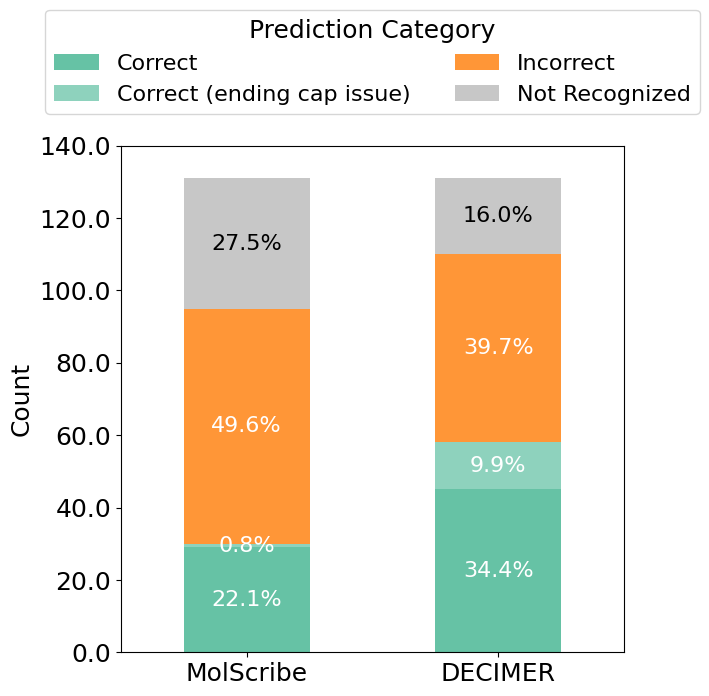

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df = validation_data[['Molscribe correctness', 'Decimer Correctness']]

# Function to map categories
def map_correctness(val):
    if val == 'T':
        return 'Correct'
    elif val == 'F':
        return 'Incorrect'
    elif val == 'T (ending cap)':
        return 'Correct (ending cap issue)'
    elif val == 'NR':
        return 'Not Recognized'
    else:
        return 'Other'

# Apply mapping
text_size =18
df_mapped = df.applymap(map_correctness)

# Count values
molscribe_counts = df_mapped['Molscribe correctness'].value_counts()
decimer_counts = df_mapped['Decimer Correctness'].value_counts()

# Ensure all categories exist
categories = ['Correct', 'Correct (ending cap issue)', 'Incorrect', 'Not Recognized']
molscribe_counts = molscribe_counts.reindex(categories, fill_value=0)
decimer_counts = decimer_counts.reindex(categories, fill_value=0)

# Create dataframe for plotting
plot_df = pd.DataFrame({
    'MolScribe': molscribe_counts,
    'DECIMER': decimer_counts
})

# Custom colors for categories (similar greens for corrects)
custom_colors = ['#66C2A5', '#8ED2BD', '#FF9637', '#c7c7c7']

# Plot
ax = plot_df.T.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 7.2),
    color=custom_colors,
)

# Set font sizes
ax.set_ylabel('Count', fontsize=text_size)
ax.set_title('', fontsize=18)
ax.set_xticklabels(plot_df.T.index, rotation=0, fontsize=text_size)
ax.set_yticklabels(ax.get_yticks(), fontsize=text_size)
plt.ylim(0, 140)

# Horizontal legend on top
ax.legend(
    title='Prediction Category',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.29),
    ncol=2,
    fontsize=16,
    title_fontsize=18,
)

# Add percentage labels
for bar_index, column in enumerate(plot_df.columns):  # categories
    cumulative = 0
    total = plot_df.T.iloc[bar_index].sum()
    for i, value in enumerate(plot_df[column]):
        if value > 0:
            percentage = f"{(value / total * 100):.1f}%"
            ax.text(
                bar_index,
                cumulative + value / 2,
                percentage,
                ha='center',
                va='center',
                fontsize=16,
                color='white' if i != 3 else 'black'
            )
            cumulative += value

plt.tight_layout()
plt.show()


#Miscellaneous

In [ ]:

image = cv2.imread(png_paths[2])
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
#Create a text file of broken smiles
text_broken =  open('broken.text', 'w+')
for i in broken:
  text_broken.write(f"{i}\n")
files.download('broken.text')
print(broken, len(broken))

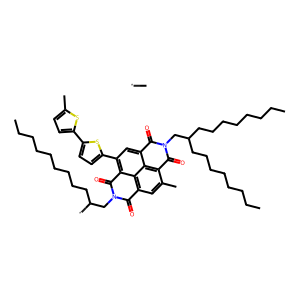

In [ ]:
mol = Chem.MolFromSmiles(smiles[1])
img = Draw.MolToImage(mol)
img

In [ ]:
pf8="CCCCCCCCC1(CCCCCCCC)c2cc(C)ccc2-c2ccc(C)cc21"

In [ ]:
output = model.predict_image_file(png_paths[73], return_atoms_bonds=True, return_confidence=True)
print(output['smiles'])
mol = Chem.MolFromSmiles(output['smiles'])
img = Draw.MolToImage(mol)
img

In [ ]:
testing_list = []
for x in broken:
  try:
    mol = Chem.MolFromSmiles(smiles[x])
    drawing = Draw.MolToImage(mol)
    testing_list.append(drawing)

print(len(testing_list))

2
